# Development rig

In [1]:
N,L_d=10,52
import sys

# setting path
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj
from waterwaves1.display import eta

In [2]:
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
s=d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi,200)

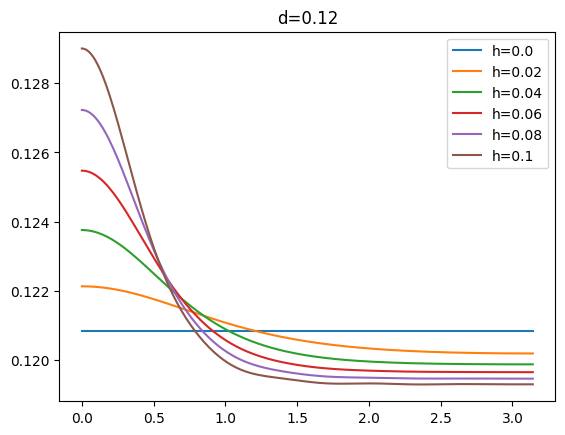

In [9]:
def eta1(h):
    sol=wave1(N,h*Hmx_d*d,d=d,scaler=s)
    eta(X,d,sol,lab=f'h={h}')
    return sol
    
for h in np.linspace(0.0,0.1,6):
    eta1(h)
plt.legend()
plt.title(f'd={d:4.2f}')
plt.show()

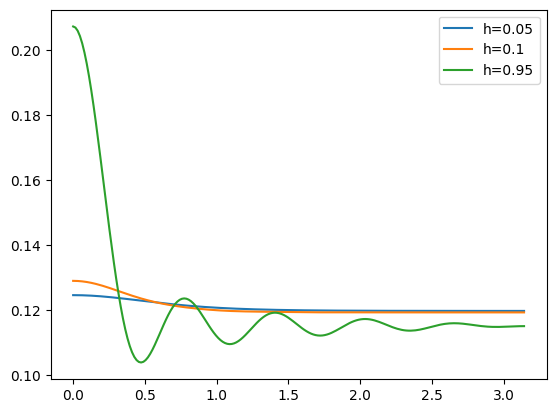

In [12]:
def step(h1,h2,h3):
    sol1=wave1(N,h1*Hmx_d*d,d=d,scaler=s)
    sol2=wave1(N,h2*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    Ej2,Q2,R2=unpack1(sol2.x)
    A3=((h2-h3)*sol1.x+(h3-h1)*sol2.x)/(h2-h1)
    sol3=wave1(N,h3*Hmx_d*d,d=d,scaler=s,A0=A3)
    if not sol3.success:
        print(h3,'fail step 2')    
    return sol3

def eta2(h1,h2,h3):
    sol=step(h1,h2,h3)
    eta(X,d,sol,lab=f'h={h3}')
eta1(0.05)
eta1(0.1)
eta2(0.05,0.10,0.95)
plt.legend()
plt.show()

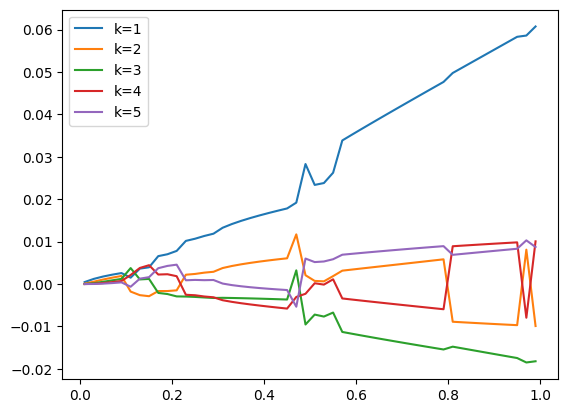

In [14]:
def E(H,k):
    SOL=[wave1(N,h*Hmx_d*d,d=d,scaler=s) for h in H]
    Ek=[sol.x[k-1] for sol in SOL]
    plt.plot(H,Ek,label=f'k={k}')

for k in range(1,6):
    E(np.linspace(0.01,0.99),k)
plt.legend()
plt.show()

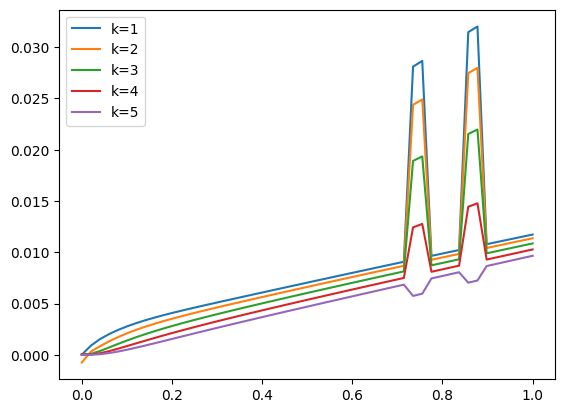

In [15]:
def E2(H):
    SOL=[step(0.05,0.1,h) for h in H]
    return SOL

def Ek(SOL,k):
    return [sol.x[k-1] for sol in SOL]

H=np.linspace(0,1)
SOL=E2(H)
for k in list(range(1,6)):
    plt.plot(H,Ek(SOL,k),label=f'k={k}')

plt.legend()
plt.show()

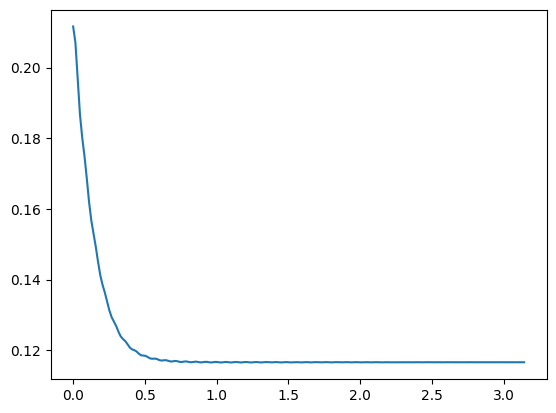

In [19]:
h=0.98
sol=step(0.05,0.1,h)
Np=80
A0=np.insert(sol.x,-2,np.zeros(Np))
solNp=wave1(N+Np,h*Hmx_d*d,d=d,scaler=s,A0=A0)
eta(X,d,solNp,f'h3={h}')

In [17]:
solNp

 message: The solution converged.
 success: True
  status: 1
     fun: [ 4.098e-11 -1.458e-11 ...  1.394e-12 -1.943e-16]
       x: [ 8.367e-03  8.014e-03 ...  5.137e-02  2.137e-01]
  method: hybr
    nfev: 203
    fjac: [[-1.866e-01 -1.671e-01 ... -1.447e-01 -4.068e-01]
           [-2.205e-01 -1.961e-01 ...  1.391e-01 -5.215e-02]
           ...
           [ 1.557e-01 -5.511e-01 ...  2.640e-02  5.672e-02]
           [-7.386e-02  2.946e-02 ...  3.202e-03  1.559e-02]]
       r: [-4.916e+00  5.972e-01 ... -5.844e+00 -6.802e-02]
     qtf: [-3.803e-11 -1.557e-11 ... -5.989e-11 -3.763e-12]